## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [794]:
import pandas as pd
import seaborn as sns
import scipy
sns.set_palette("Accent")
sns.set_style("darkgrid")
print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [795]:
# solução
filmes=pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [796]:
filmes.columns=(['filmeId','titulo','generos'])
filmes.index=filmes.filmeId
filmes.drop(['filmeId'],axis=1,inplace=True)
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [797]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [798]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [799]:
# solução
notas=pd.read_csv('ratings.csv')
notas.columns=['usuarioId', 'filmeId', 'nota','momento']

In [800]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [801]:
# solução
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()
filmes['nota_media']=medias_por_filme

In [802]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [803]:
# solução para calcular o total de votos por filme
total_de_votos = notas.groupby("filmeId").count()
filmes['total_de_votos']=total_de_votos.usuarioId
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [804]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.query("total_de_votos >= 50")

In [805]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


In [806]:
filmes.shape

(450, 5)

# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

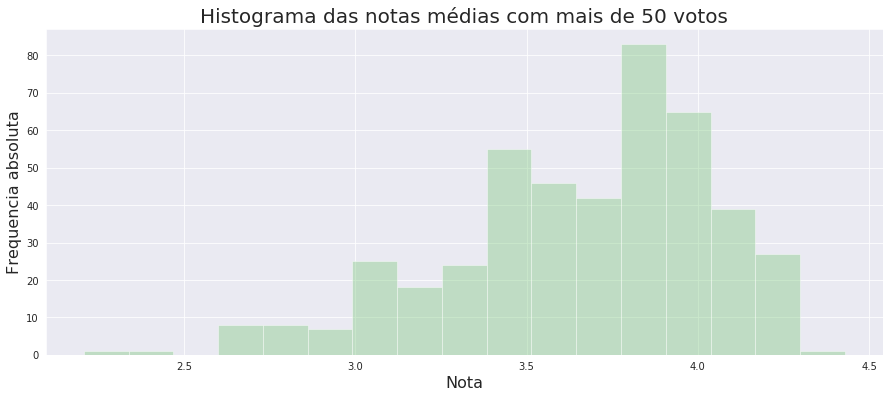

In [807]:
# solução histograma
ax = sns.distplot(filmes.nota_media, norm_hist=False, kde=False)
ax.figure.set_size_inches(15, 6)
ax.set_title('Histograma das notas médias com mais de 50 votos', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Nota', fontsize=16)
ax

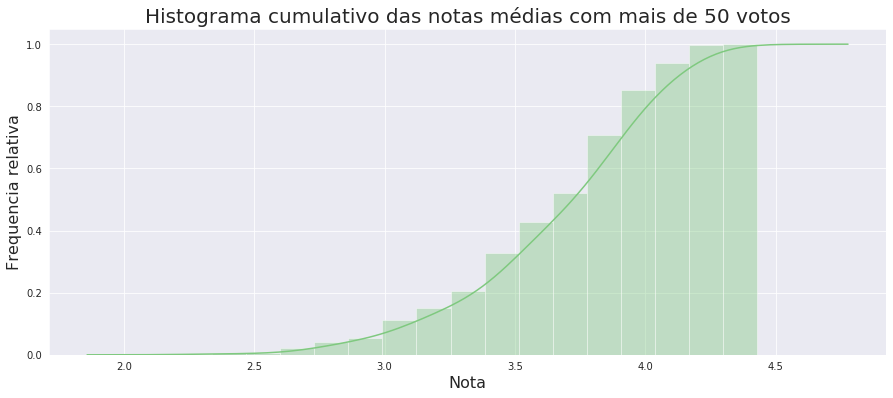

In [808]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, kde_kws={'cumulative':True},hist_kws={'cumulative':True} )
ax.figure.set_size_inches(15, 6)
ax.set_title('Histograma cumulativo das notas médias com mais de 50 votos', fontsize=20)
ax.set_ylabel('Frequencia relativa', fontsize=16)
ax.set_xlabel('Nota', fontsize=16)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

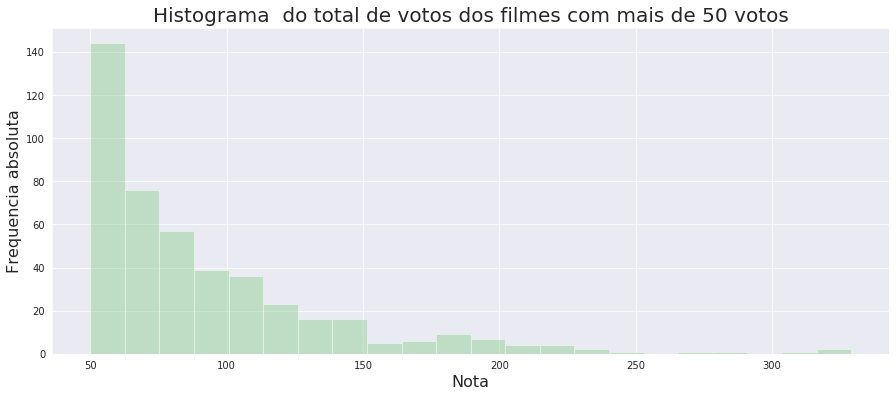

In [809]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos, norm_hist=False, kde=False)
ax.figure.set_size_inches(15, 6)
ax.set_title('Histograma  do total de votos dos filmes com mais de 50 votos', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Nota', fontsize=16)
ax

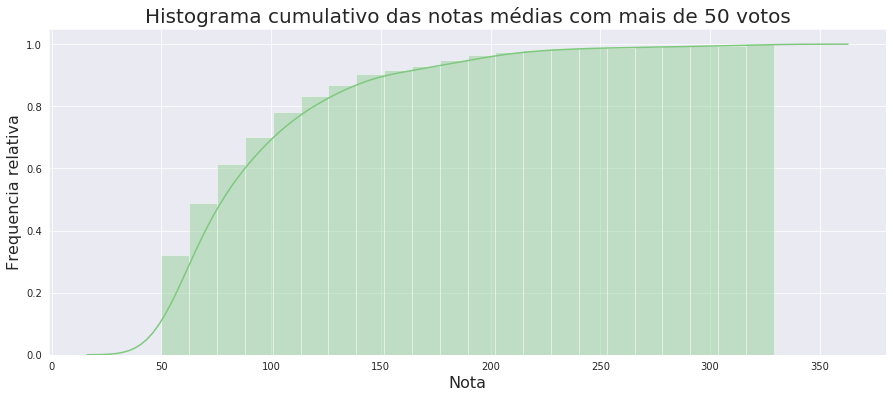

In [810]:
# solução cumulativa
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos, kde_kws={'cumulative':True},hist_kws={'cumulative':True} )
ax.figure.set_size_inches(15, 6)
ax.set_title('Histograma cumulativo das notas médias com mais de 50 votos', fontsize=20)
ax.set_ylabel('Frequencia relativa', fontsize=16)
ax.set_xlabel('Nota', fontsize=16)
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [811]:
# solução
print('20% dos filmes do dataframe tem nota maior que',(filmes.nota_media.quantile(.2).round(2)))

20% dos filmes do dataframe tem nota maior que 3.37


In [812]:
nota_limite_dos_20_porcento=filmes.nota_media.quantile(.2)
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [813]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [814]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [815]:
# solução
generos.sum().sort_values(ascending=False)


Comedy         181
Drama          166
Action         164
Adventure      132
Thriller       121
SciFi           92
Crime           87
Romance         85
Fantasy         66
Children        47
Mystery         38
Animation       32
IMAX            28
Horror          26
Musical         21
War             19
Western         12
FilmNoir         4
Documentary      2
dtype: int64

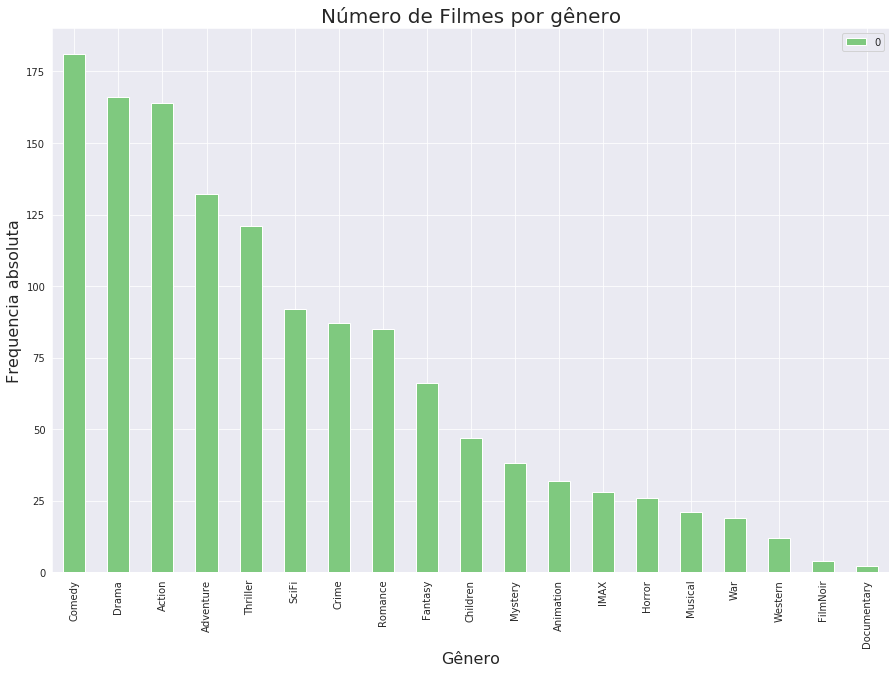

In [816]:
q=pd.DataFrame(generos.sum().sort_values(ascending=False))
ax=q.plot.bar()
ax.figure.set_size_inches(15, 10)
ax.set_title('Número de Filmes por gênero', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Gênero', fontsize=16)
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [817]:
# solução

generos.sum().sort_values(ascending=False).head(5)


Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64

In [818]:
top5_generos_em_quantidade_de_filmes=generos.sum().sort_values(ascending=False).head(5)
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [819]:
# solucão
gen=list(q.index)
a=list()
b=list()
for i in range(len(gen)):
    selecao=filmes[gen[i]]==1
    a.append(gen[i])
    b.append(filmes[selecao].total_de_votos.sum())
n=pd.DataFrame(data=b,index=a).sort_values(0,ascending=False)
n

,0
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0
Children,4331.0


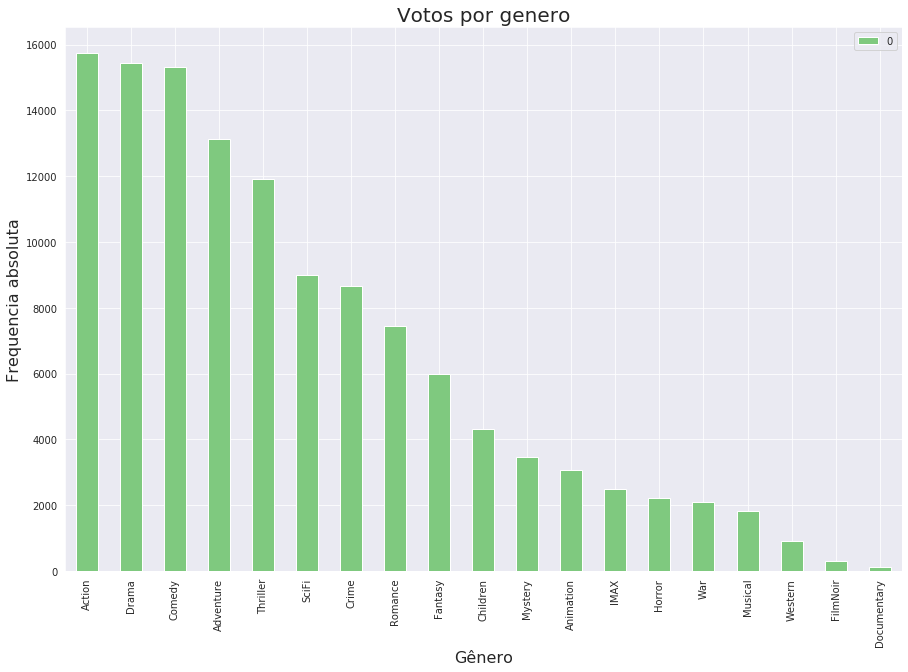

In [820]:
# solução
ax=n.plot.bar()
ax.figure.set_size_inches(15, 10)
ax.set_title('Votos por genero', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Gênero', fontsize=16)
ax

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [821]:
# solucao código
gen=list(q.index)
a=list()
b=list()
for i in range(len(gen)):
    selecao=filmes[gen[i]]==1
    a.append(gen[i])
    b.append(filmes[selecao].total_de_votos.sum()/q.loc[q.index[i]][0])
p=pd.DataFrame(data=b,index=a).sort_values(0,ascending=False)
p

,0
War,111.210526
Crime,99.413793
Adventure,99.371212
Thriller,98.404959
SciFi,97.706522
Action,95.939024
Animation,95.812500
Drama,93.042169
Children,92.148936
Mystery,90.842105


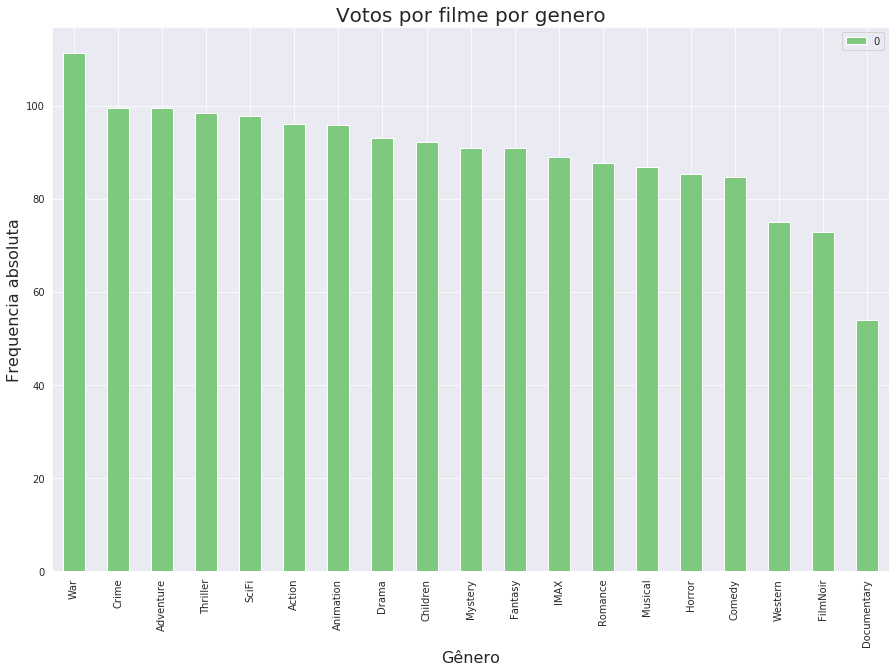

In [822]:
# solução com visualização 
ax=p.plot.bar()
ax.figure.set_size_inches(15, 10)
ax.set_title('Votos por filme por genero', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Gênero', fontsize=16)
ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    

Há muitos filmes de ACTION e poucos de WAR, sendo assim, a soma dos votos de ACTION resulta numa proporção maior de votos, porém ao relacionarmos com o número de títulos de cada gênero fica explicito que WAR possui uma relação mais alta de notas em proporção ao numero de títulos do gênero

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [823]:
import matplotlib.pyplot as plt

In [824]:
Horror=filmes[(filmes.Horror==1)]
Adventure=filmes[(filmes.Adventure==1)]

Text(0.5, 0, 'Gênero')

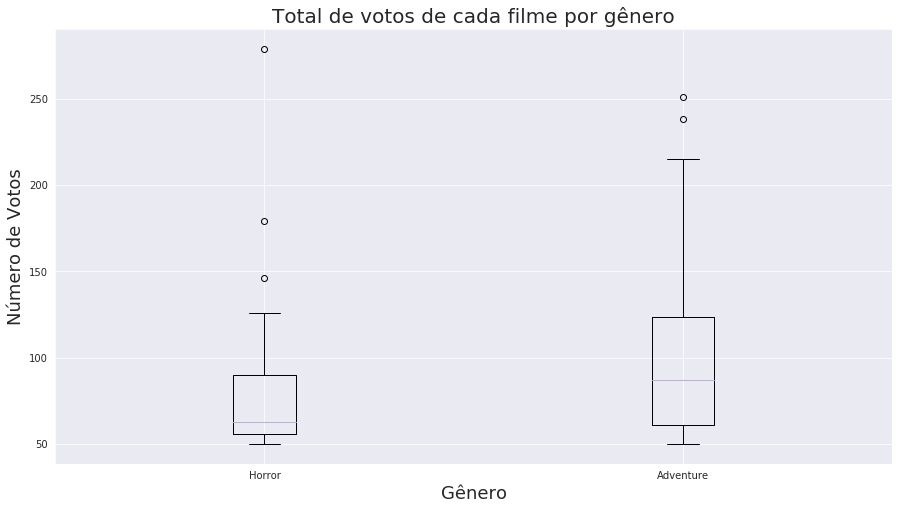

In [825]:
# solução:
plt.figure(figsize=(15,8))
ax=plt.boxplot(x=[Horror.total_de_votos,Adventure.total_de_votos], labels=['Horror','Adventure'])
plt.title("Total de votos de cada filme por gênero",fontsize=20)
plt.ylabel('Número de Votos', fontsize=18)
plt.xlabel('Gênero', fontsize=18)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 0, 'Gênero')

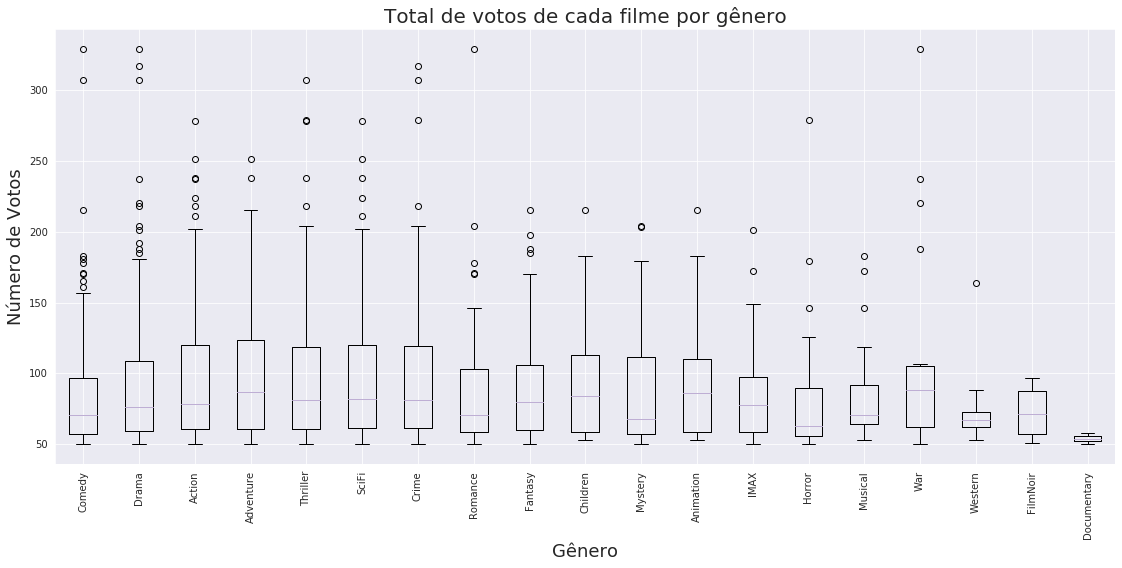

In [826]:
qq=[]
for i in range(len(gen)):
    qq.append(filmes[(filmes[gen[i]]==1)].total_de_votos)
plt.figure(figsize=(19,8))
plt.xticks(rotation=90)
ax=plt.boxplot(x=qq, labels=gen)
plt.title("Total de votos de cada filme por gênero",fontsize=20)
plt.ylabel('Número de Votos', fontsize=18)
plt.xlabel('Gênero', fontsize=18)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:

### Recomendaria o gênero ADVENTURE, pois possui maior numero de votos e quartis mais altos que HORROR depois de analisas seus BOXPLOT


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

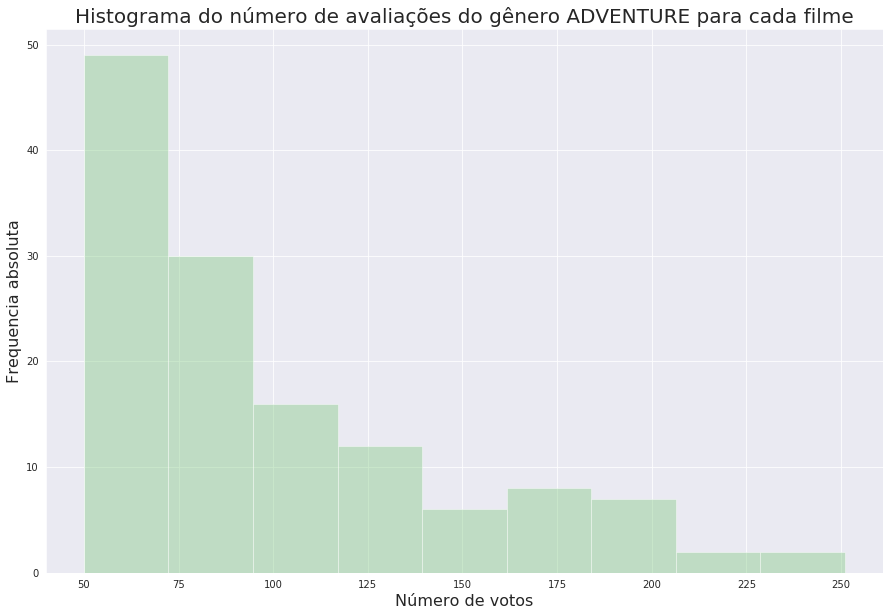

In [827]:
# solucao histograma de aventura
ax=sns.distplot(Adventure.total_de_votos, norm_hist=False, kde=False)
ax.figure.set_size_inches(15, 10)
ax.set_title('Histograma do número de avaliações do gênero ADVENTURE para cada filme', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Número de votos', fontsize=16)
ax

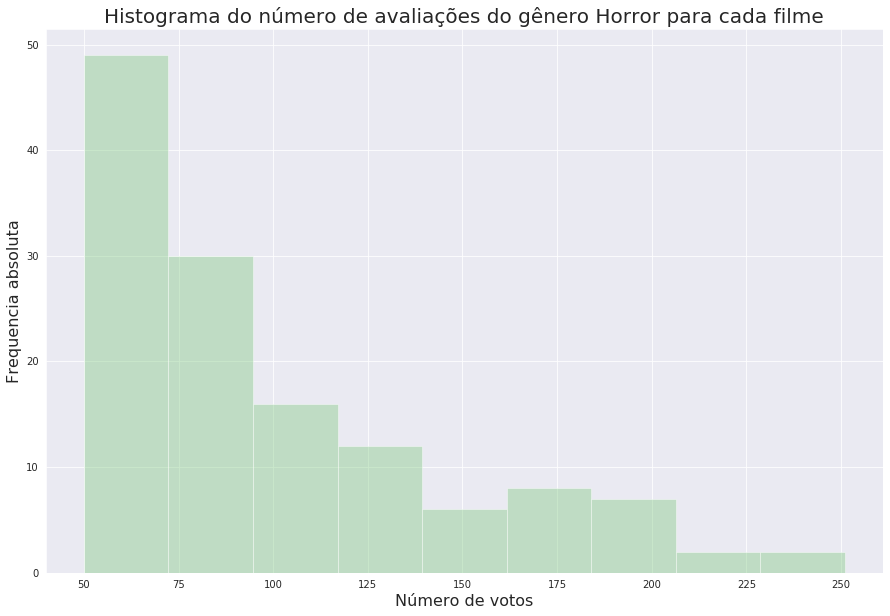

In [828]:
# solucao histograma de horror
ax=sns.distplot(Adventure.total_de_votos, norm_hist=False, kde=False)
ax.figure.set_size_inches(15, 10)
ax.set_title('Histograma do número de avaliações do gênero Horror para cada filme', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Número de votos', fontsize=16)
ax

# solucao teste de normalidade ou justificativa para nao utiliza-lo

### Ambos os histogramas apresentam agressiva ASSIMETRIA, logo não há fundamento usar testes de normalidade, o teste Wilcoxon será utilizado

In [829]:
import statsmodels as sm
from statsmodels.stats.weightstats import DescrStatsW
descr_horror = DescrStatsW(Horror.total_de_votos)
descr_adventure = DescrStatsW(Adventure.total_de_votos)
comparacao = descr_adventure.get_compare(descr_horror)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,14.1789,10.230,1.386,0.168,-6.028,34.386


## P value muito maior que 5%, recorro à teste de Wilcoxon

In [830]:
# solução com o teste desejado
#WILCOXON
from scipy.stats import ranksums
_, p= ranksums(Adventure.total_de_votos,Horror.total_de_votos)
print('\t\t p_value = ',p.round(4)*100,'% < 5 %')

		 p_value =  4.78 % < 5 %


### Solução (explique sua conclusão):
### Pelo teste de wilcoxon podemos dizer que o total de votos de forma aleatória de Adventure é maior que dem Horror


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 0, 'Gênero')

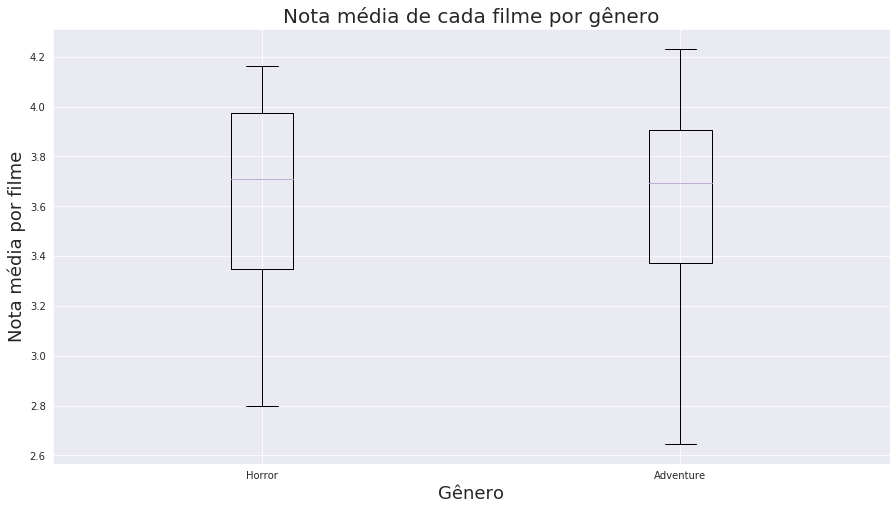

In [831]:
# solução:
plt.figure(figsize=(15,8))
ax=plt.boxplot(x=[Horror.nota_media,Adventure.nota_media], labels=['Horror','Adventure'])
plt.title("Nota média de cada filme por gênero",fontsize=20)
plt.ylabel('Nota média por filme', fontsize=18)
plt.xlabel('Gênero', fontsize=18)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

### Neste caso é muito difícil distinguir por análise gráfica dos boxplots das notas médias qual gênero teria maior sucesso, mas aparentemente os quartis dos boxplots da média das notas de HORROR são mais altas

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

## Horror não é uma curva normal

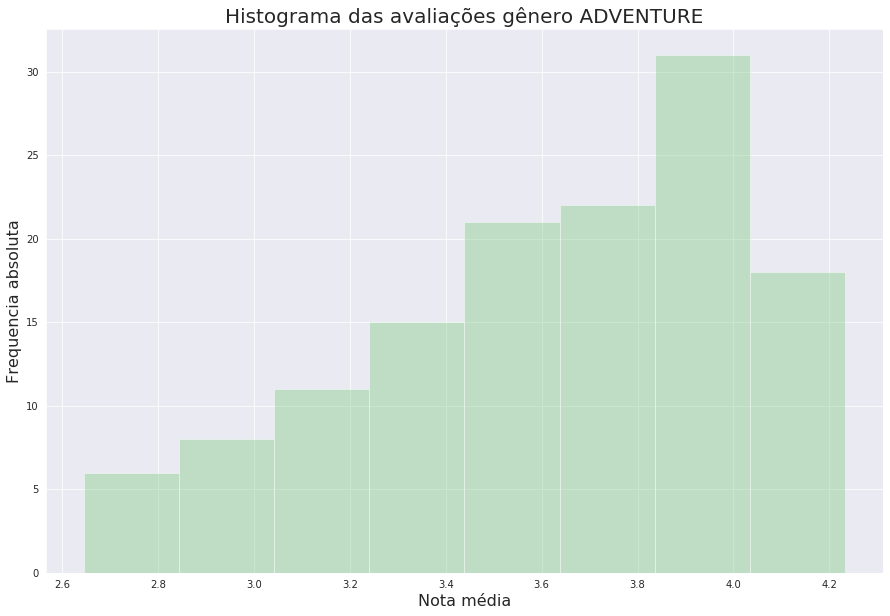

In [832]:
# solucao histograma de aventura
ax=sns.distplot(Adventure.nota_media, norm_hist=False, kde=False)
ax.figure.set_size_inches(15, 10)
ax.set_title('Histograma das avaliações gênero ADVENTURE', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Nota média', fontsize=16)
ax

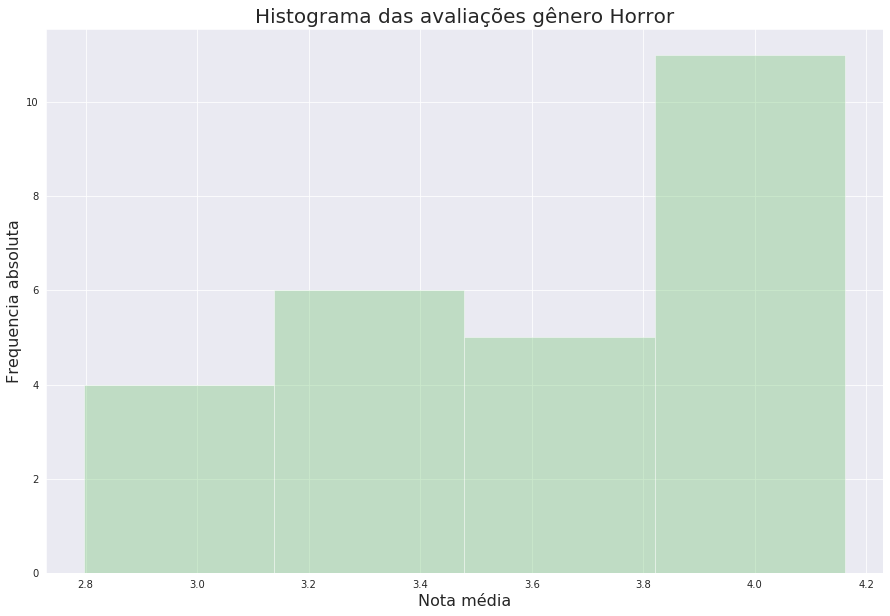

In [833]:
# solucao histograma de horror
ax=sns.distplot(Horror.nota_media, norm_hist=False, kde=False)
ax.figure.set_size_inches(15, 10)
ax.set_title('Histograma das avaliações gênero Horror', fontsize=20)
ax.set_ylabel('Frequencia absoluta', fontsize=16)
ax.set_xlabel('Nota média', fontsize=16)
ax

###  solucao teste de normalidade ou justificativa para nao utiliza-lo

### A distribuição é muito assimétrica e seu Pvalue é muito acima de 5%, um teste com normalidade não tem fundamento

In [834]:
descr_horror = DescrStatsW(Horror.nota_media)
descr_adventure = DescrStatsW(Adventure.nota_media)
comparacao = descr_adventure.get_compare(descr_horror)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


In [835]:
# solução com o teste desejado Willcoxon
from scipy.stats import ranksums
_, p= ranksums(Adventure.nota_media,Horror.nota_media)
print('\t\t p_value = ',p.round(4)*100,'% > 5 %')

		 p_value =  83.1 % > 5 %


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
 ### Não, à partir do teste de Wilcoxon constato que não há segurança para afirmar qual valor de nota média é maior entre gêneros Adventure e Horror

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [836]:
k=[]
for i in range(len(gen)):
    k.append(filmes[(filmes[gen[i]]==1)].total_de_votos.sum())
k=pd.DataFrame(data=k,index=gen)
k.sort_values([0],ascending=False).head(2)
k.columns=['Total de votos']
k.index.rename('Gênero', inplace=True)

In [837]:
votos_por_genero=k
votos_por_genero

,Total de votos
Gênero,
Comedy,15330.0
Drama,15445.0
Action,15734.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0


In [838]:
# solução: calculando os 2 generos mais votados
votos_por_genero.head(2)

,Total de votos
Gênero,
Comedy,15330.0
Drama,15445.0


In [839]:
# solução: encontrando os top 5 filmes desses generos
melhores_5_drama_ou_comedia=filmes[((filmes['Comedy']==1)+(filmes['Drama']==1))].sort_values('nota_media',ascending=False).head(5)
melhores_5_drama_ou_comedia[['titulo','nota_media','Comedy','Drama']]

/home/oppenheimer/miniconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,titulo,nota_media,Comedy,Drama
filmeId,,,,
318,"Shawshank Redemption, The (1994)",4.429022,0,1
858,"Godfather, The (1972)",4.289062,0,1
2959,Fight Club (1999),4.272936,0,1
1276,Cool Hand Luke (1967),4.271930,0,1
750,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,1,0


## Top 5 filmes  dos 2 gêneros mais assistidos ^ TABELA ACIMA

## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [840]:
correlacao=filmes[['nota_media']+gen].corr().round(2).head(1)
correlacao.sort_values('nota_media',axis=1).transpose()

,nota_media
Comedy,-0.26
Action,-0.15
SciFi,-0.14
Adventure,-0.08
Romance,-0.07
Western,-0.06
Horror,-0.03
Children,-0.03
Fantasy,-0.02
Thriller,-0.02


In [841]:
# solucao
print("\n\nSão os 2 generos com MENOR valor de correlação com a nota_media\n")
print(correlacao.sort_values('nota_media',axis=1).transpose()[0:2])
print('\n\n\nSão os 2 generos com MAIOR valor de correlação com a nota_media\n')
print(correlacao.sort_values('nota_media',axis=1).transpose()[len(correlacao.sort_values('nota_media',axis=1).transpose())-3:len(correlacao.sort_values('nota_media',axis=1).transpose())-1])



São os 2 generos com MENOR valor de correlação com a nota_media

        nota_media
Comedy       -0.26
Action       -0.15



São os 2 generos com MAIOR valor de correlação com a nota_media

       nota_media
Crime        0.19
Drama        0.28


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [842]:
correlacao=filmes[['total_de_votos']+gen].corr().round(2).head(1)
correlacao.sort_values('total_de_votos',axis=1).transpose()

,total_de_votos
Comedy,-0.13
Documentary,-0.06
Western,-0.06
Romance,-0.05
Horror,-0.04
FilmNoir,-0.04
Musical,-0.02
IMAX,-0.02
Mystery,-0.01
Fantasy,-0.01


In [843]:
# solucao
print("\n\nSão os 2 generos com MENOR valor de correlação com total_de_votos\n")
print(correlacao.sort_values('total_de_votos',axis=1).transpose()[0:2])
print('\n\n\nSão os 2 generos com MAIOR valor de correlação com total_de_votos\n')
print(correlacao.sort_values('total_de_votos',axis=1).transpose()[len(correlacao.sort_values('total_de_votos',axis=1).transpose())-3:len(correlacao.sort_values('total_de_votos',axis=1).transpose())-1])



São os 2 generos com MENOR valor de correlação com total_de_votos

             total_de_votos
Comedy                -0.13
Documentary           -0.06



São os 2 generos com MAIOR valor de correlação com total_de_votos

           total_de_votos
War                  0.09
Adventure            0.10


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

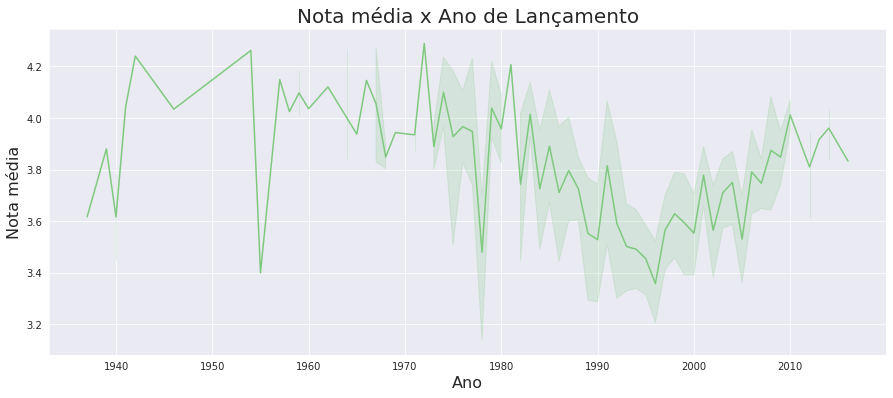

In [844]:
# solucao
ax=sns.lineplot(filmes['ano_de_lancamento'],filmes['nota_media'])
ax.figure.set_size_inches(15, 6)
ax.set_title('Nota média x Ano de Lançamento', fontsize=20)
ax.set_ylabel('Nota média', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [845]:
# solução (código)
filmes[['nota_media','ano_de_lancamento']].corr().round(2).head(1)

,nota_media,ano_de_lancamento
nota_media,1.0,-0.16


### Solução (explicação)

### Correlação não implica causalidade, mas com há a necessidade de havem um grande numero de dados até que a Nota_media se aproxime de uma estabilidade. Com poucos votos pode haver a percepção errada de direta correlação

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

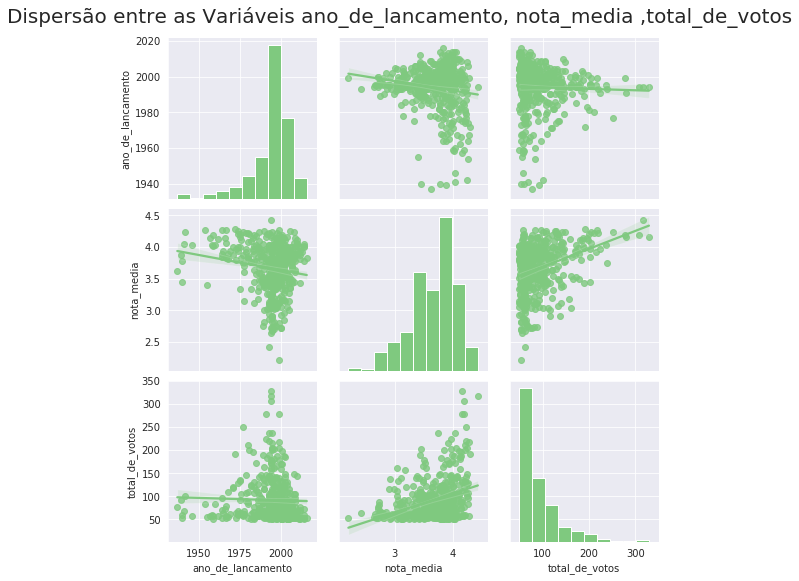

In [846]:
# solução
infos=filmes[['ano_de_lancamento', 'nota_media' ,'total_de_votos']]
ax=sns.pairplot(infos,kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media ,total_de_votos', fontsize=20, y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

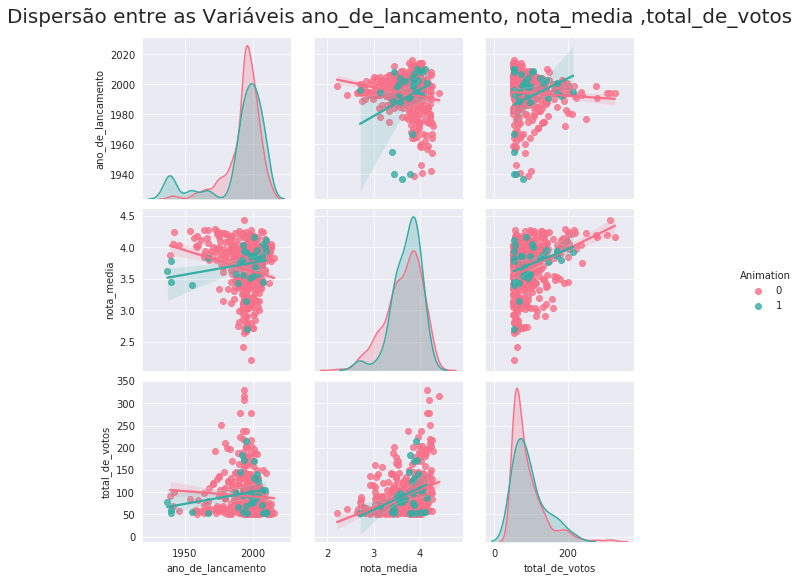

In [847]:
ax=sns.pairplot(filmes,'Animation',palette=("husl"),x_vars=infos.columns,y_vars=infos.columns,kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media ,total_de_votos', fontsize=20, y=1.05)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

###  Solução:

###  - A nota média das animações aparentam melhorar quanto mais recente o filme


###  - O total de votos das animações aparenta aumentar com o passar dos anos


###  - As outras categorias enquanto um todo homogêneo também aparentam ter maiores médias de notas com o maior numero de avaliações, porém a nota média parece diminuir quanto mais recente o filme

###  - O que me leva a acreditar à isso é por análise da linha de tendência da regressão linear ao analisar os gráficos

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## EXPLORANDO OS GÊNEROS MAIS CORRELACIONADOS

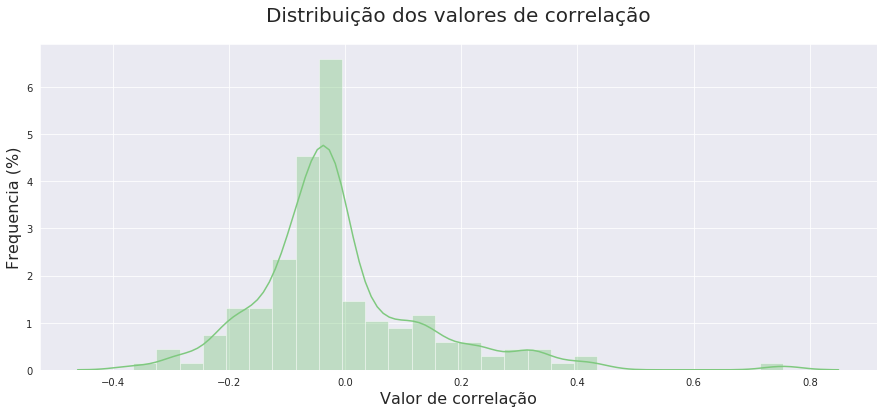

In [848]:
# solução
r0=[]
r=[]
rr=[]
rrr=[]
corr=filmes[gen].corr()
for i in range(corr.shape[0]):
    for ii in range(corr.shape[1]):
        if i==ii:
            break
        r0.append((corr.iloc[i,ii]))
        rr.append(i)
        rrr.append(ii)
r=pd.DataFrame([r0,rr,rrr]).transpose()
r0=pd.Series(r0).sort_values(ascending=False)
ax=sns.distplot(r0)
ax.figure.set_size_inches(15, 6)
ax.set_title('Distribuição dos valores de correlação', fontsize=20, y=1.05)
ax.set_ylabel('Frequencia (%)', fontsize=16)
ax.set_xlabel('Valor de correlação', fontsize=16)
ax

In [849]:
rel=r[(abs(r[0])>.4)]
tema=[]
for i in range(len(rel)):
    print('Correlacao =',rel.iloc[i,0].round(2),'\t entre gêneros ',corr.index[rel.iloc[i,1]],corr.columns[rel.iloc[i,2]] )
    tema.append((corr.columns[rel.iloc[i,2]],corr.columns[rel.iloc[i,1]]))

Correlacao = 0.75 	 entre gêneros  Animation Children
Correlacao = 0.41 	 entre gêneros  Musical Children
Correlacao = 0.43 	 entre gêneros  Musical Animation


##  Os filmes mais correlacionados fazem muito sentido de seus temas, isto é, Animation + Children são gêneros bem compativeis em um filme

# Gráficos dos 3 mais correlacionados

/home/oppenheimer/miniconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


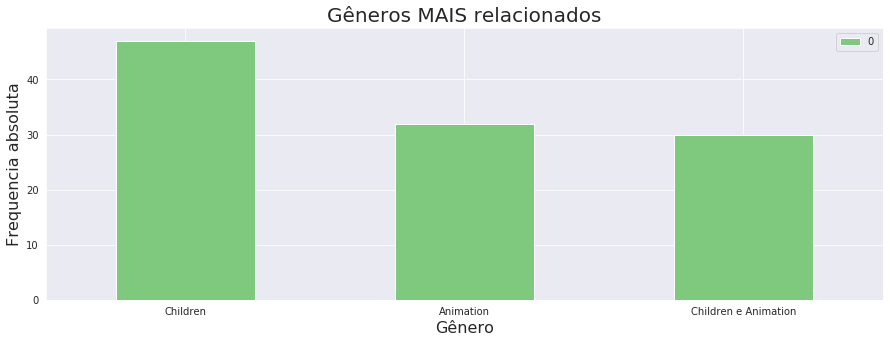

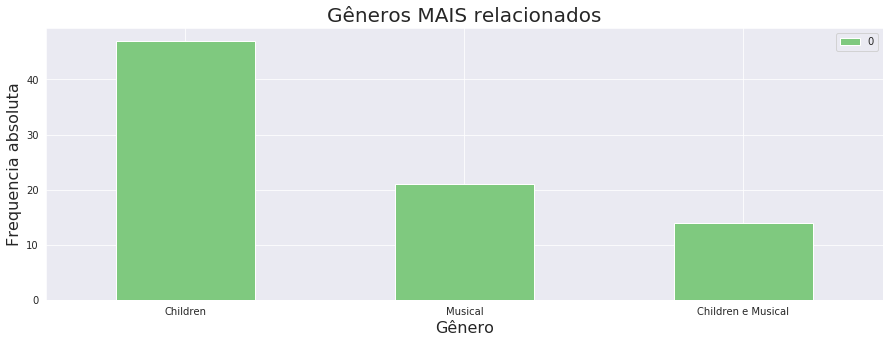

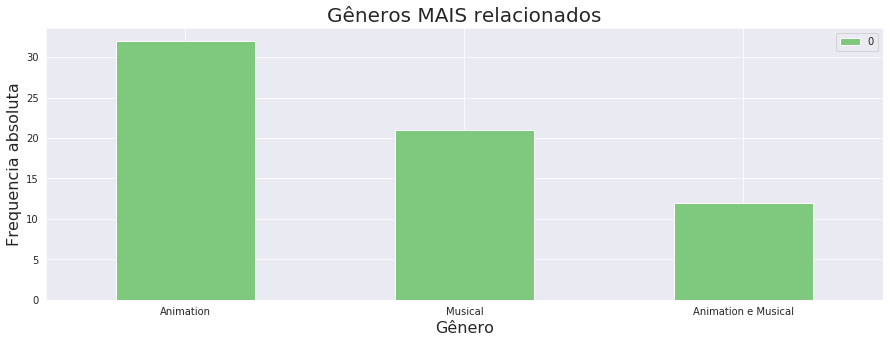

In [850]:
ax=[None]*len(tema)
for i in range(len(tema)):
    tema1=filmes[filmes[tema[i][0]]==1].shape[(0)]
    tema2=filmes[filmes[tema[i][1]]==1].shape[(0)]
    tema12=filmes[(filmes[tema[i][0]]==1)*(filmes[tema[i][1]]==1)].shape[(0)]
    t=(tema[i][0],tema[i][1],tema[i][0]+' e '+tema[i][1])
    res=pd.DataFrame([tema1,tema2,tema12],index=t)
    res=res.sort_values(0,ascending=False)
    ax[i]=res.plot.bar()
    ax[i].figure.set_size_inches(15, 5)
    ax[i].set_title('Gêneros MAIS relacionados', fontsize=20)
    ax[i].set_ylabel('Frequencia absoluta', fontsize=16)
    plt.xticks(rotation=0)
    ax[i].set_xlabel('Gênero', fontsize=16)
ax

##  É fácil perceber que generos mais correlacionados compartilham mais filmes

# Gêneros menos relacionados

In [851]:
rel=r[(abs(r[0])<.007)]
rel
tema=[]
for i in range(len(rel)):
    print('Correlacao =',rel.iloc[i,0].round(4),'\t entre gêneros ',corr.index[rel.iloc[i,1]],corr.columns[rel.iloc[i,2]] )
    tema.append((corr.columns[rel.iloc[i,2]],corr.columns[rel.iloc[i,1]]))

Correlacao = -0.0054 	 entre gêneros  Thriller Adventure
Correlacao = 0.0049 	 entre gêneros  Western Comedy
Correlacao = -0.0063 	 entre gêneros  Documentary FilmNoir


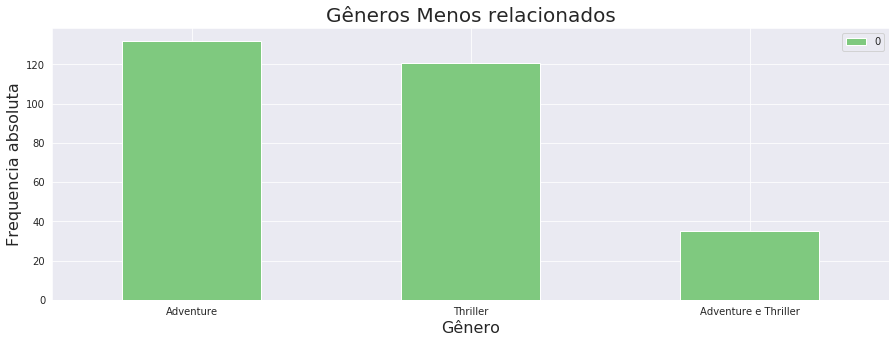

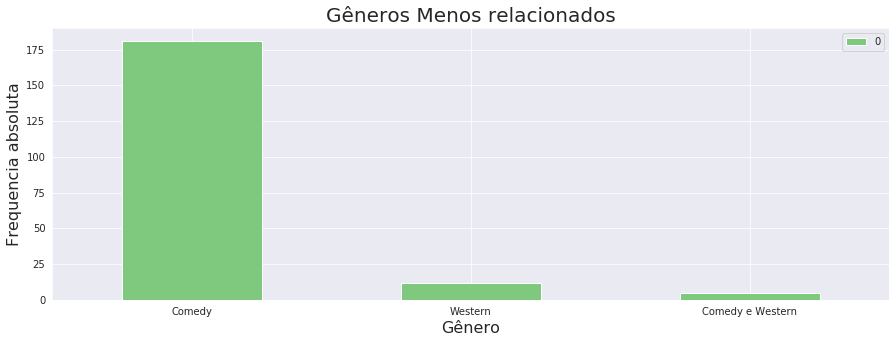

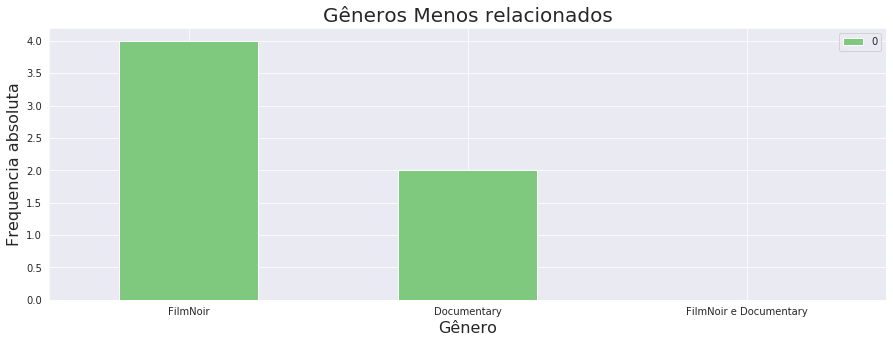

In [852]:
ax=[None]*len(tema)
for i in range(len(tema)):
    tema1=filmes[filmes[tema[i][0]]==1].shape[(0)]
    tema2=filmes[filmes[tema[i][1]]==1].shape[(0)]
    tema12=filmes[(filmes[tema[i][0]]==1)*(filmes[tema[i][1]]==1)].shape[(0)]
    t=(tema[i][0],tema[i][1],tema[i][0]+' e '+tema[i][1])
    res=pd.DataFrame([tema1,tema2,tema12],index=t)
    res=res.sort_values(0,ascending=False)
    ax[i]=res.plot.bar()
    ax[i].figure.set_size_inches(15, 5)
    ax[i].set_title('Gêneros Menos relacionados', fontsize=20)
    ax[i].set_ylabel('Frequencia absoluta', fontsize=16)
    plt.xticks(rotation=0)
    ax[i].set_xlabel('Gênero', fontsize=16)
ax

#  É fácil notar que gêneros muito pouco correlacionados praticamente não compartilham Títulos, pois constrastam seus temas. Vale notar que o fato destes gêneros terem baixo número avaliações também compromete a possível correlação entre eles.